<a href="https://colab.research.google.com/github/dsreliete/Womakerscode-DA-desafio_squad/blob/main/Desafio4SquadMaryJackson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from scipy.stats import norm
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.power import NormalIndPower
from tabulate import tabulate
from statsmodels.formula.api import ols  # Importando a função ols
import statsmodels.api as sm

In [ ]:
url = "https://raw.githubusercontent.com/dsreliete/Womakerscode-DA-desafio_squad/refs/heads/main/desafio_01_cosmeticos_challenge_testehipoteses.csv"
df = pd.read_csv(url)
df.head()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
0,1,1,12,40,1
1,2,2,5,36,0
2,1,3,19,47,0
3,1,4,14,36,1
4,1,5,17,46,1


## Desafio 1 : Cosméticos
Suponha que você trabalha em uma empresa do ramo de cosméticos ou beleza. O Time de produtos dessa empresa está interessado criar novos batons com maior durabilidade. Para isso estão testando 3 diferentes fórmulas para irem a mercado.

Com isso, a empresa fez uma pesquisa com varias voluntárias e populou a base de dados (desafio_01_cosmeticos.csv) contendo as seguintes informações:

● id_produto: código identificador do produto, com a fórmula utilizada. Para diferenciarmos de se trata do batom com a fórmula 1, 2 ou 3

● id_voluntária: código identificador da voluntária que utilizou o produto.

● durabilidade: quanto tempo o produto durou em horas.

● idade: idade da voluntária

● exposicao_sol: variável que indica 1 se a voluntária se expos ao sol 0 caso contrário.

De posse dessas informações, o time de produtos solicitou aos analistas de dados da empresa as seguintes perguntas a serem respondidas:

## Análise Exploratória

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id_produto     300 non-null    int64
 1   id_voluntária  300 non-null    int64
 2   durabilidade   300 non-null    int64
 3   idade          300 non-null    int64
 4   exposicao_sol  300 non-null    int64
dtypes: int64(5)
memory usage: 11.8 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_produto,300.0,2.000000,0.817861,1.0,1.00,2.0,3.00,3.0
id_voluntária,300.0,150.500000,86.746758,1.0,75.75,150.5,225.25,300.0
durabilidade,300.0,17.133333,10.942945,5.0,9.00,14.0,20.00,48.0
idade,300.0,36.886667,12.625841,18.0,26.00,36.0,48.00,60.0
exposicao_sol,300.0,0.440000,0.497216,0.0,0.00,0.0,1.00,1.0


In [ ]:
# Calculando a amplitude e a variância
cosmetico_desc = df.describe().T
cosmetico_desc['amplitude'] = cosmetico_desc['max'] - cosmetico_desc['min']
cosmetico_desc['variância'] = df.var()

print(cosmetico_desc[['mean', 'std', 'min', 'max', 'amplitude', 'variância']])

                     mean        std   min    max  amplitude    variância
id_produto       2.000000   0.817861   1.0    3.0        2.0     0.668896
id_voluntária  150.500000  86.746758   1.0  300.0      299.0  7525.000000
durabilidade    17.133333  10.942945   5.0   48.0       43.0   119.748049
idade           36.886667  12.625841  18.0   60.0       42.0   159.411862
exposicao_sol    0.440000   0.497216   0.0    1.0        1.0     0.247224


Nos dados acima, podemos observar que a idade máxima das nossas voluntárias é de 60 anos e a mínima é de 18 anos, com uma média de 36 anos e desvio padrão de 12,62. Ou seja:

**Durabilidade** A durabilidade média é de aproximadamente 17 horas, variando de 5 a 48 horas. Há uma grande dispersão nos dados, com alguns produtos apresentando durabilidades muito superiores ou inferiores à média.

**Idade** A idade média das voluntárias é de aproximadamente 37 anos, variando de 18 a 60 anos. Há uma distribuição relativamente uniforme das idades na amostra.

**Exposição ao Sol** A exposição média ao sol é de 0,44. A maioria das voluntárias foi exposta ao sol, conforme indicado pela contagem.

**ID do produto e ID da voluntária** Ambas as variáveis têm distribuições uniformes, com cada valor aparecendo aproximadamente o mesmo número de vezes

Histogramas para visualizar a distribuição das variáveis contínuas: durabilidade, idade e exposicao_sol.

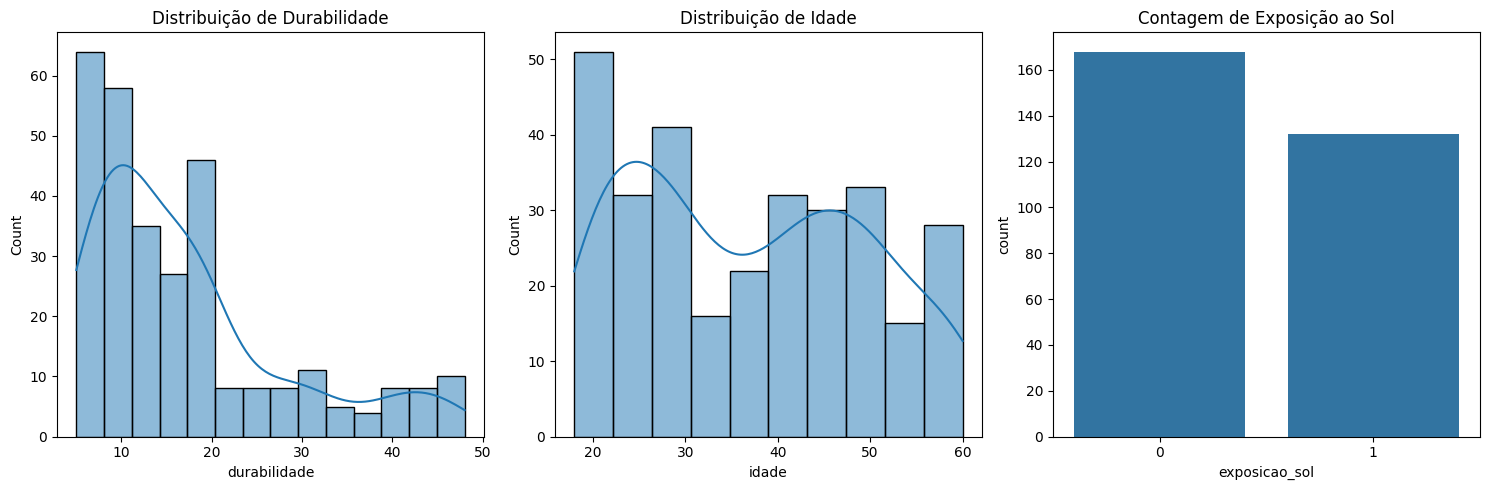

In [ ]:
# Histogramas das variáveis contínuas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['durabilidade'], kde=True)
plt.title('Distribuição de Durabilidade')

plt.subplot(1, 3, 2)
sns.histplot(df['idade'], kde=True)
plt.title('Distribuição de Idade')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='exposicao_sol')
plt.title('Contagem de Exposição ao Sol')


plt.tight_layout()
plt.show()

**Desafio 1 : Cosméticos**



1 - Existe diferenca estatisticamente significativa na durabilidade dos batons com formulas diferentes?


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


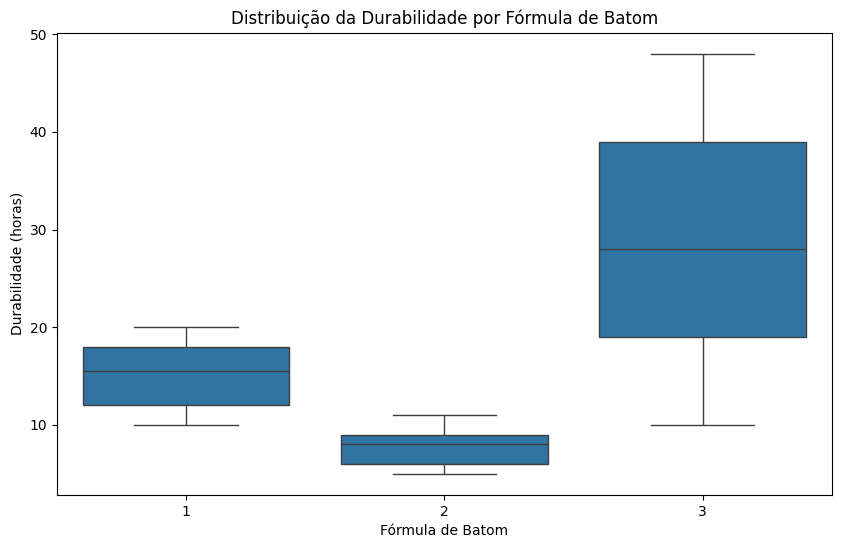

(240.6680561187368,
 7.345246616757137e-63,
 'Rejeitamos a hipótese nula (H₀). Existe uma diferença significativa na durabilidade entre as fórmulas.')

In [ ]:
formula1 = df[df['id_produto'] == 1]['durabilidade']
formula2 = df[df['id_produto'] == 2]['durabilidade']
formula3 = df[df['id_produto'] == 3]['durabilidade']

plt.figure(figsize=(10, 6))
sns.boxplot(x='id_produto', y='durabilidade', data=df)
plt.title('Distribuição da Durabilidade por Fórmula de Batom')
plt.xlabel('Fórmula de Batom')
plt.ylabel('Durabilidade (horas)')
plt.show()

# Realizar ANOVA (one-way) para testar a hipótese
resultado_anova = stats.f_oneway(formula1, formula2, formula3)

# Definir nível de significância (alfa)
alfa = 0.05

# Interpretação da conclusão
if resultado_anova.pvalue < alfa:
    conclusao = "Rejeitamos a hipótese nula (H₀). Existe uma diferença significativa na durabilidade entre as fórmulas."
else:
    conclusao = "Falhamos em rejeitar a hipótese nula (H₀). Não há diferença significativa na durabilidade entre as fórmulas."

# Mostrar os resultados do ANOVA e a conclusão
resultado_anova.statistic, resultado_anova.pvalue, conclusao

2 - Essa diferenca persiste ou nao quando a voluntária se expoe ao sol?


                                      sum_sq     df           F        PR(>F)
C(id_produto)                   20776.647260    2.0  368.358558  8.232900e-81
C(exposicao_sol)                 3163.363212    1.0  112.169389  2.042442e-22
C(id_produto):C(exposicao_sol)   2207.808096    2.0   39.143226  8.474310e-16
Residual                         8291.288692  294.0         NaN           NaN
Rejeitamos a hipótese nula: A diferença na durabilidade persiste considerando a exposição ao sol.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


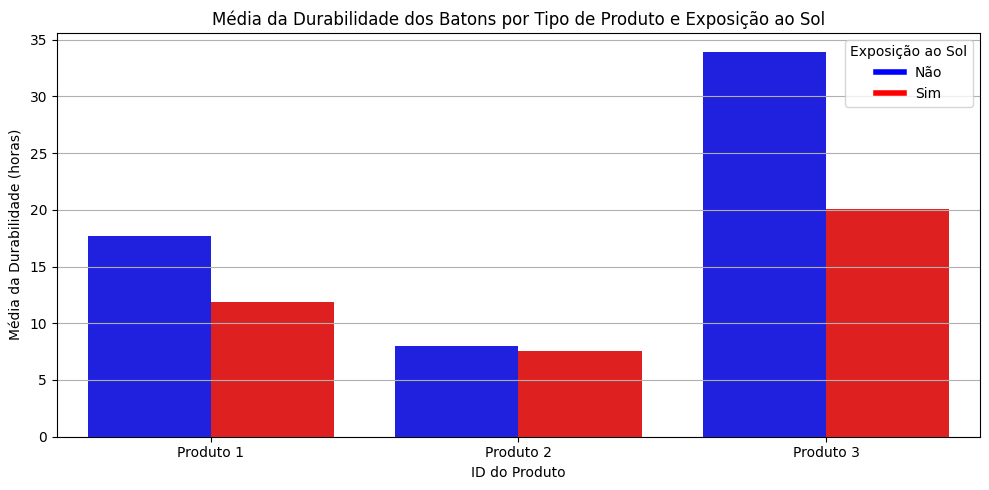

In [ ]:
# Utilizar ANOVA de dois fatores
modelo = ols('durabilidade ~ C(id_produto) * C(exposicao_sol)', data=df).fit()
anova_resultado = sm.stats.anova_lm(modelo, typ=2)

# Analisar os resultados
print(anova_resultado)

# Interpretar o p-valor para a interação
alpha = 0.05  # nível de significância
if anova_resultado['PR(>F)']['C(id_produto):C(exposicao_sol)'] < alpha:
    print("Rejeitamos a hipótese nula: A diferença na durabilidade persiste considerando a exposição ao sol.")
else:
    print("Não rejeitamos a hipótese nula: A diferença na durabilidade não persiste considerando a exposição ao sol.")

# Criar uma tabela de médias de durabilidade por produto e exposição ao sol
media_durabilidade = df.groupby(['id_produto', 'exposicao_sol'])['durabilidade'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(data=media_durabilidade, x='id_produto', y='durabilidade', hue='exposicao_sol', palette=['blue', 'red'], dodge=True)
plt.title('Média da Durabilidade dos Batons por Tipo de Produto e Exposição ao Sol')
plt.xlabel('ID do Produto')
plt.ylabel('Média da Durabilidade (horas)')
plt.xticks(ticks=[0, 1, 2], labels=['Produto 1', 'Produto 2', 'Produto 3'])

# Ajustando a legenda
handles = [
    plt.Line2D([0], [0], color='blue', lw=4, label='Não'),
    plt.Line2D([0], [0], color='red', lw=4, label='Sim')
]
plt.legend(handles=handles, title='Exposição ao Sol', loc='upper right')

plt.grid(axis='y')
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()

2.1 E com relacao a idade?


                     sum_sq     df           F        PR(>F)
C(id_produto)  19164.960432    2.0  234.182371  1.053604e-61
idade           1550.471682    1.0   37.891352  2.428528e-09
Residual       12111.988318  296.0         NaN           NaN
Rejeitamos a hipótese nula: a idade tem um efeito significativo na durabilidade.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


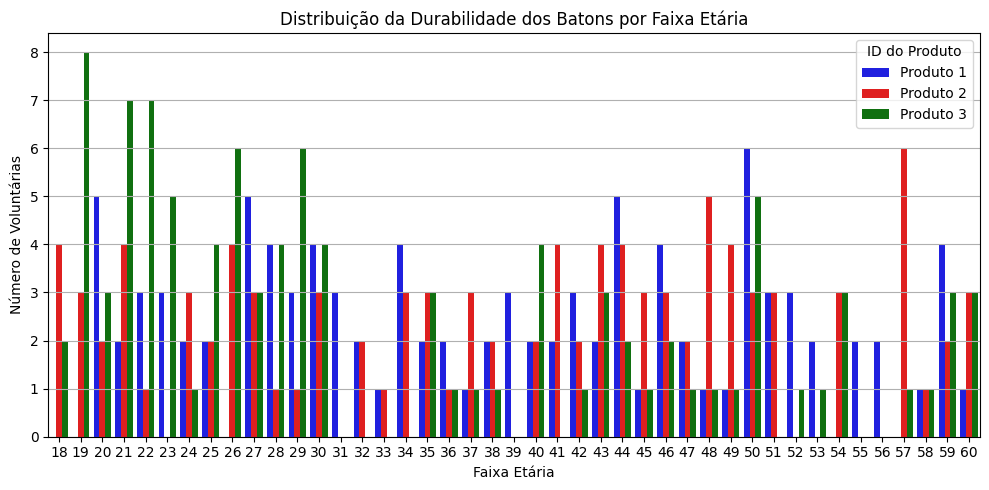

In [ ]:
media_durabilidade_idade = df.groupby(['idade', 'id_produto'])['durabilidade'].mean().reset_index()

# ANOVA de dois fatores considerando idade
modelo_idade = ols('durabilidade ~ C(id_produto) + idade', data=df).fit()
anova_resultado_idade = sm.stats.anova_lm(modelo_idade, typ=2)

# Analisando os resultados
print(anova_resultado_idade)

# Interpretar o p-valor para a idade
alpha = 0.05  # nível de significância
if anova_resultado_idade['PR(>F)']['idade'] < alpha:
    print("Rejeitamos a hipótese nula: a idade tem um efeito significativo na durabilidade.")
else:
    print("Não rejeitamos a hipótese nula: a idade não tem um efeito significativo na durabilidade.")

# Gráfico de barras agrupadas
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='idade', hue='id_produto', palette=['blue', 'red', 'green'])

plt.title('Distribuição da Durabilidade dos Batons por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Voluntárias')
plt.legend(title='ID do Produto', labels=['Produto 1', 'Produto 2', 'Produto 3'], loc='upper right')
plt.grid(axis='y')
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()

3- Qual fórmula de batom você indicaria para consumidores que buscam maior durabilidade e exposição ao sol?

In [ ]:
medias_durabilidade = df.groupby(['id_produto', 'exposicao_sol'])['durabilidade'].mean().unstack()
print(medias_durabilidade)

exposicao_sol          0          1
id_produto                         
1              17.727273  11.911111
2               7.961538   7.562500
3              33.901639  20.102564


<Figure size 1000x600 with 0 Axes>

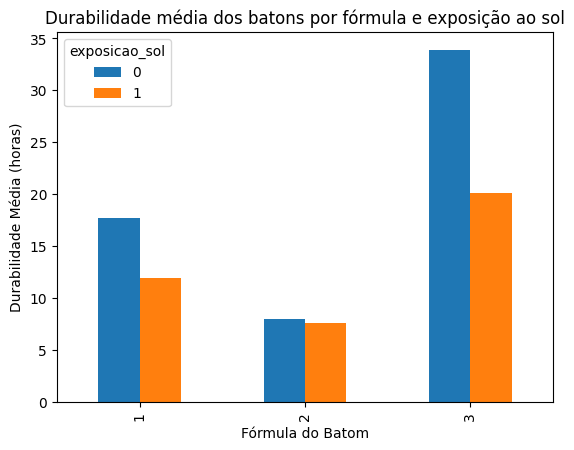

In [ ]:
plt.figure(figsize=(10, 6))
medias_durabilidade.plot(kind='bar')
plt.xlabel('Fórmula do Batom')
plt.ylabel('Durabilidade Média (horas)')
plt.title('Durabilidade média dos batons por fórmula e exposição ao sol')
plt.show()

### Análise de Resultado

Embora tenhamos examinado variáveis como exposição ao sol, idade das voluntárias e fórmula do batom, os resultados gerais não apresentaram significância estatística. Contudo, com base nas médias de durabilidade obtidas, verificamos que o batom com a **fórmula 3** teve a melhor performance em termos de durabilidade, seguido pelo batom 2.

Portanto, mesmo não podendo afirmar com total certeza que esses fatores impactam diretamente a durabilidade de forma significativa, recomendamos o uso do batom 3, dado seu melhor desempenho geral, seguido pelo batom 2.

**Desafio 2 :**


Imagine que voce trabalha em uma empresa do setor alimentício, e o preço de determinado produto, um novo picolé, tem uma distribuição normal com média igual a 7,85 e desvio padrão igual a 3,32. Suspeita-se que devido ao verão, em determinadas localidades de praia o preco do picolé esteja mais caro.
Para verificar se esse efeito é estatisticamente significativo, contactaram voce, analista de dados.
Suponha que para realizar essa análise voce tenha dados de 45 lojas em cidades do litoral, escolhidas aleatoriamente. E constatou que o preço médio do picolé nessas cidades é de R$11,52.

1. Voce pode concluir que existe diferenca de precos estatisticamente relevante com 5% de significancia?



In [ ]:
# Dados do problema
media_populacional = 7.85  # Média populacional
media_amostral = 11.52  # Média amostral
desvio_padrao_populacional = 3.32  # Desvio padrão populacional
n = 45  # Tamanho da amostra
alfa = 0.05  # Nível de significância

#cálculo do valor do teste t
t_stat = (media_amostral - media_populacional) / (desvio_padrao_populacional / np.sqrt(n))

#graus de liberdade
df = n - 1

#valor crítico para um teste bicaudal com 5% de significância
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, df)

#resultados
print(f"Valor crítico t (5% de significância): {t_critical}")

#decisão
if abs(t_stat) > t_critical:
    print("Rejeita a hipótese nula: Existe uma diferença estatisticamente significativa nos preços.")
else:
    print("Não rejeita a hipótese nula: Não há diferença estatisticamente significativa nos preços.")

Valor crítico t (5% de significância): 2.0153675744437636
Rejeita a hipótese nula: Existe uma diferença estatisticamente significativa nos preços.



2. Qual o valor da variável teste, o intervalo de confianca e o p-valor?

In [ ]:
# Dados do problema
media_populacional = 7.85  # Média populacional
media_amostral = 11.52  # Média amostral
desvio_padrao_populacional = 3.32  # Desvio padrão populacional
n = 45  # Tamanho da amostra
alfa = 0.05  # Nível de significância

# Cálculo da estatística t
t_stat = (media_amostral - media_populacional) / (desvio_padrao_populacional / np.sqrt(n))

# Print
print(f"O valor da variável de teste (t): {t_stat:.2f}")

O valor da variável de teste (t): 7.42


In [ ]:
# Intervalo de confiança
t_critico = stats.t.ppf(1 - alfa/2, df=n-1)
intervalo_confianca = (
    media_amostral - t_critico * (desvio_padrao_populacional / np.sqrt(n)),
    media_amostral + t_critico * (desvio_padrao_populacional / np.sqrt(n))
)
# Print
print(f"O intervalo de confiança (95%): ({intervalo_confianca[0]:.2f}, {intervalo_confianca[1]:.2f})")

O intervalo de confiança (95%): (10.52, 12.52)


In [ ]:
# Cálculo do p-valor
p_valor = 1 - stats.t.cdf(t_stat, df=n-1)

t_stat, intervalo_confianca, p_valor

# Print
print(f"O p-valor é {p_valor:.2e}")

O p-valor é 1.41e-09


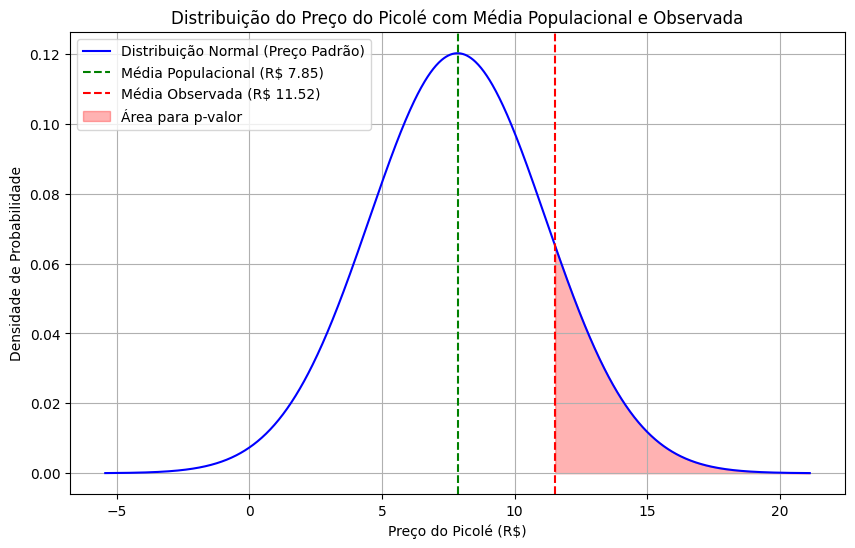

In [ ]:
# Dados para a distribuição normal
x = np.linspace(media_populacional - 4 * desvio_padrao_populacional, media_populacional + 4 * desvio_padrao_populacional, 1000)
y = stats.norm.pdf(x, media_populacional, desvio_padrao_populacional)

# Plotando a distribuição normal
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Distribuição Normal (Preço Padrão)", color="blue")

# Destacando a média populacional e o preço médio observado nas cidades de praia
plt.axvline(media_populacional, color="green", linestyle="--", label=f"Média Populacional (R$ {media_populacional})")
plt.axvline(media_amostral, color="red", linestyle="--", label=f"Média Observada (R$ {media_amostral})")

# Configurações do gráfico
plt.fill_between(x, 0, y, where=(x >= media_amostral), color='red', alpha=0.3, label="Área para p-valor")
plt.title("Distribuição do Preço do Picolé com Média Populacional e Observada")
plt.xlabel("Preço do Picolé (R$)")
plt.ylabel("Densidade de Probabilidade")
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()

Este é o gráfico da distribuição normal do preço do picolé, com a média populacional (7,85 reais) destacada em verde e o preço médio aplicado nas cidades de praia (11,52 reais) em vermelho. A área sombreada em vermelho à direita mostra a região correspondente ao p-valor.
Esse gráfico ajuda a visualizar como o valor apresentado se encontra em uma região de preços muito mais altos, o que sustenta a exclusão da hipótese nula.